<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/NLP/Project/NLP_AirlineTweetSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import the libraries, load dataset, print shape of data, data description

In [380]:
!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [381]:
# load dataset
data = pd.read_csv('https://github.com/vasantbala/vb_ai_course/blob/main/NLP/Project/Tweets.csv?raw=true')

In [382]:
# print shape of data
data.shape

(14640, 15)

In [383]:
# data description
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [384]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 2. Understand of data-columns

In [385]:
### 2.a Drop all other columns except “text” and “airline_sentiment”.
trimmed_data = data.copy(deep=True)
for col in data.columns:
  if (col != 'airline_sentiment' and col != 'text'):
    trimmed_data.drop([col], axis=1, inplace=True)

In [386]:
# 2.b Check the shape of data
trimmed_data.shape

(14640, 2)

In [387]:
# 2.c Print first 5 rows of data.

trimmed_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## 3. Text pre-processing: Data preparation

In [388]:
# 3.a Html tag removal.
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: strip_html(x))
trimmed_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [389]:
# 3.b Tokenization
trimmed_data['text'] = trimmed_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [390]:
# 3.c Remove the numbers
def remove_numbers(textList):
  for tokenIndex in range(0, len(textList)):
    textList[tokenIndex] = re.sub(r'\d+', '', textList[tokenIndex])
  return textList

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: remove_numbers(x))


In [391]:
trimmed_data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [392]:
# 3.d Removal of Special Characters and Punctuations
def replace_contractions(text):
    """Replace contractions in string of text"""
    new_words = []
    for word in text:
      new_word = contractions.fix(word)
      if new_word != '':
        new_words.append(new_word)
    return new_words

trimmed_data['text'] = trimmed_data['text'].apply(lambda x: replace_contractions(x))

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: remove_punctuation(x))        


trimmed_data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, ve, added, commerci..."
2,neutral,"[VirginAmerica, I, did, nt, today, Must, mean,..."
3,negative,"[VirginAmerica, it, s, really, aggressive, to,..."
4,negative,"[VirginAmerica, and, it, s, a, really, big, ba..."


In [393]:
# 3.e Conversion to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: to_lowercase(x))    

In [394]:
# 3.f Lemmatize or stemming
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: lemmatize_list(x))    
trimmed_data.head()    

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, ve, add, commercial..."
2,neutral,"[virginamerica, i, do, nt, today, must, mean, ..."
3,negative,"[virginamerica, it, s, really, aggressive, to,..."
4,negative,"[virginamerica, and, it, s, a, really, big, ba..."


In [395]:
# 3.g Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
def normalize(words):   
    return ' '.join(words)
trimmed_data['text'] = trimmed_data['text'].apply(lambda x: normalize(x))    

In [396]:
# 3.h Print first 5 rows of data after pre-processing
trimmed_data.head()  

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you ve add commercials to t...
2,neutral,virginamerica i do nt today must mean i need t...
3,negative,virginamerica it s really aggressive to blast ...
4,negative,virginamerica and it s a really big bad thing ...


In [397]:
# 4. Vectorization
trimmed_data['airline_sentiment'].unique()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["negative", "neutral", "positive"])
list(le.classes_)
trimmed_data['label'] = le.transform(trimmed_data['airline_sentiment'])

In [398]:
#4.a Use CountVectorizer
data_for_countVectorizer = trimmed_data.copy(deep=True)
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

ct_vectorizer = CountVectorizer(max_features=2000)                # Keep only 1000 features as number of features will increase the processing time.
cv_data_features = ct_vectorizer.fit_transform(data_for_countVectorizer['text'])
cv_data_features = cv_data_features.toarray()                        # Convert the data features to array.

In [399]:
cv_data_features.shape

(14640, 2000)

In [400]:
labels = data_for_countVectorizer['label']
labels = labels.astype('int')

In [401]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cv_data_features, labels, test_size=0.3, random_state=42)

In [402]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

cv_forest = cv_forest.fit(X_train, y_train)

print(cv_forest)

print(np.mean(cross_val_score(cv_forest, cv_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7175546448087432


[[2643  122   49]
 [ 479  344   61]
 [ 248  107  339]]


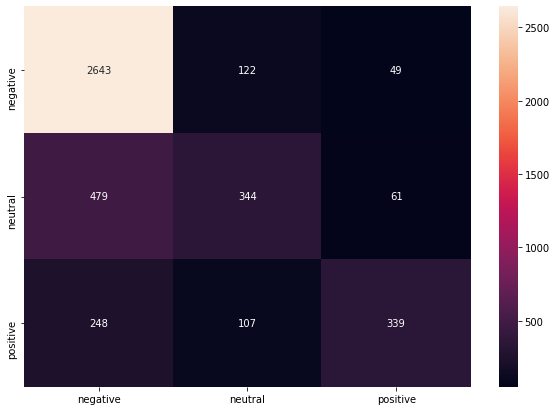

In [403]:
# Predict the result for test data using the model built above.
cv_result = cv_forest.predict(X_test)
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, cv_result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["negative", "neutral", "positive"]],
                  columns = [i for i in ["negative", "neutral", "positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [404]:
print('The accuracy score of the predicted model using CountVectorizer is: ', round(accuracy_score(y_test, cv_result),2)) 

The accuracy score of the predicted model using CountVectorizer is:  0.76


In [405]:
# TfidfVectorizer
data_for_TfidfVectorizer = trimmed_data.copy(deep=True)
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=2000)
tv_data_features = t_vectorizer.fit_transform(data_for_TfidfVectorizer['text'])

tv_data_features = tv_data_features.toarray()

tv_data_features.shape

(14640, 2000)

In [406]:
X_train, X_test, y_train, y_test = train_test_split(tv_data_features, labels, test_size=0.3, random_state=42)

In [407]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
tv_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
tv_forest = tv_forest.fit(X_train, y_train)
print(tv_forest)
print(np.mean(cross_val_score(tv_forest, tv_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7177595628415301


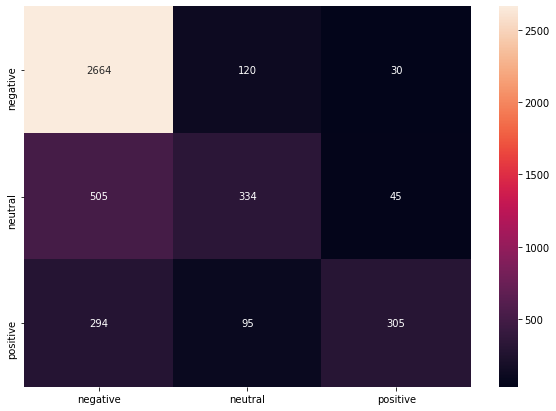

In [408]:
tv_result = tv_forest.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tv_result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["negative", "neutral", "positive"]],
                  columns = [i for i in ["negative", "neutral", "positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [409]:
print('The accuracy score of the predicted model using TfidfVectorizer is: ', round(accuracy_score(y_test, tv_result),2)) 

The accuracy score of the predicted model using TfidfVectorizer is:  0.75


In [410]:
# Try to improve the model
### 2.a Drop all other columns except “text” and “airline_sentiment”.
trimmed_data2 = data.copy(deep=True)
for col in data.columns:
  if (col != 'airline_sentiment' and col != 'text'):
    trimmed_data2.drop([col], axis=1, inplace=True)

In [411]:
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: strip_html(x))
trimmed_data2['text'][0]

'@VirginAmerica What @dhepburn said.'

In [412]:
## Remove mentions (twitter handle names eg: @VirginAmerica) from the sentence
def remove_mentions(words):
    return " ".join(filter(lambda x:x[0]!='@', words.split()))

trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: remove_mentions(x))

In [413]:
trimmed_data2.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [414]:
 #Fix contractions
 for i in range(0, len(trimmed_data2['text'])):
   trimmed_data2['text'][i] = contractions.fix(trimmed_data2['text'][i])

In [415]:
# Do other pre-processings
trimmed_data2['text'] = trimmed_data2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: to_lowercase(x))    
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: remove_numbers(x))
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: remove_punctuation(x)) 
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: lemmatize_list(x))
trimmed_data2['text'] = trimmed_data2['text'].apply(lambda x: normalize(x))   


In [416]:
trimmed_data2.head()

,airline_sentiment,text
0,neutral,what say
1,positive,plus you have add commercials to the experienc...
2,neutral,i do not today must mean i need to take anothe...
3,negative,it be really aggressive to blast obnoxious ent...
4,negative,and it be a really big bad thing about it


In [417]:
# 4. Vectorization
trimmed_data2['airline_sentiment'].unique()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["negative", "neutral", "positive"])
list(le.classes_)
trimmed_data2['label'] = le.transform(trimmed_data2['airline_sentiment'])

In [418]:
#4.a Use CountVectorizer
data_for_countVectorizer = trimmed_data2.copy(deep=True)
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

ct_vectorizer = CountVectorizer(max_features=2000)                # Keep only 1000 features as number of features will increase the processing time.
cv_data_features = ct_vectorizer.fit_transform(data_for_countVectorizer['text'])
cv_data_features = cv_data_features.toarray()                        # Convert the data features to array.

In [419]:
#4.a Use CountVectorizer
data_for_countVectorizer = trimmed_data2.copy(deep=True)
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

ct_vectorizer = CountVectorizer(max_features=2000)                # Keep only 1000 features as number of features will increase the processing time.
cv_data_features = ct_vectorizer.fit_transform(data_for_countVectorizer['text'])
cv_data_features = cv_data_features.toarray()                        # Convert the data features to array.

In [420]:
labels = data_for_countVectorizer['label']
labels = labels.astype('int')

In [421]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cv_data_features, labels, test_size=0.3, random_state=42)

In [422]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

cv_forest = cv_forest.fit(X_train, y_train)

print(cv_forest)

print(np.mean(cross_val_score(cv_forest, cv_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7436475409836065


[[2642  123   49]
 [ 461  376   47]
 [ 262   98  334]]


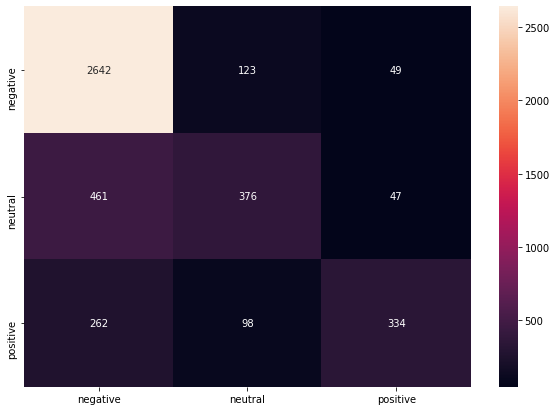

In [423]:
# Predict the result for test data using the model built above.
cv_result = cv_forest.predict(X_test)
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, cv_result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["negative", "neutral", "positive"]],
                  columns = [i for i in ["negative", "neutral", "positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [424]:
print('The accuracy score of the predicted model using CountVectorizer after removing the mentions is: ', round(accuracy_score(y_test, cv_result),2)) 

The accuracy score of the predicted model using CountVectorizer after removing the mentions is:  0.76


In [425]:
# TfidfVectorizer
data_for_TfidfVectorizer = trimmed_data2.copy(deep=True)
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=2000)
tv_data_features = t_vectorizer.fit_transform(data_for_TfidfVectorizer['text'])

tv_data_features = tv_data_features.toarray()

tv_data_features.shape

(14640, 2000)

In [426]:

X_train, X_test, y_train, y_test = train_test_split(tv_data_features, labels, test_size=0.3, random_state=42)

In [427]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
tv_forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
tv_forest = tv_forest.fit(X_train, y_train)
print(tv_forest)
print(np.mean(cross_val_score(tv_forest, tv_data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7323087431693989


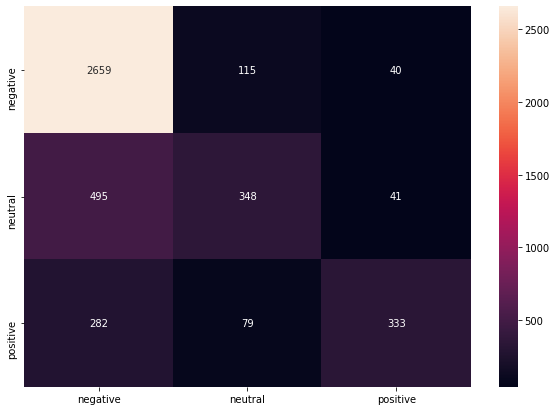

In [428]:
tv_result = tv_forest.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tv_result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["negative", "neutral", "positive"]],
                  columns = [i for i in ["negative", "neutral", "positive"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [429]:
print('The accuracy score of the predicted model using TfidfVectorizer after removing the mentions is: ', round(accuracy_score(y_test, tv_result),2)) 

The accuracy score of the predicted model using TfidfVectorizer after removing the mentions is:  0.76


## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

1. The dataset had tweets from about the airline or flight experience from the customer
2. The goal was to build a model for sentiment analysis for the reviews obtained from user tweets. The sentiment was classified as negative, positive and neutral
3. Initially preprocessed the data with various methods like HTML tag removal, tokenization, number removal, special chars and punctuations,  lower case conversion and lemmatize
4. Built the classification models with Count Vectorizer and TFIDF Vectorizer.
5. Both the classification models had similar accuracy. 71%
6. Removed the twitter handle names (or mentions) from the tweets and the model accuracy increased to 76%